# Homework 2-8: Simulating Lotka–Volterra

This task involves simulating the Lotka-Volterra predator-prey dynamics using two numerical methods: Euler's method and the Runge-Kutta 4th-order method. The Lotka-Volterra model describes the interactions between prey and predator populations over time using the following differential equations:

- **Prey Population** ($x$): $ \frac{dx}{dt} = x \cdot (k - a \cdot y) $
- **Predator Population** ($y$): $ \frac{dy}{dt} = -y \cdot (l - b \cdot x) $

Where:
- $k$: Prey growth rate
- $l$: Predator death rate
- $a$: Predation coefficient
- $b$: Predator reproduction coefficient

The simulation uses four parameter sets, three different step sizes ($h = 0.1, 0.05, 0.01$), and three initial states: $ (50, 5), (100, 10), (200, 20) $. The aim is to observe how population dynamics evolve under different initial conditions and parameter configurations.

**Steps in the Simulation**:
1. **Define the Lotka-Volterra Equations**: Differential equations regarding the prey and predator dynamics.
2. **Implement Numerical Methods**:
   - Euler's method
   - Runge-Kutta (4th-order)
3. **Simulate the Dynamics**:
   - For each parameter set, integrate the equations using both methods and each step size.
   - Use the specified initial states for the prey and predator populations.


/var/folders/hd/zbd8pxds5rb7s_5m29d5mvcm0000gn/T/ipykernel_66829/52382966.py:44: RuntimeWarning: overflow encountered in scalar multiply
  return prey * (params['growth_rate'] - params['predation_coeff'] * predator)
/var/folders/hd/zbd8pxds5rb7s_5m29d5mvcm0000gn/T/ipykernel_66829/52382966.py:48: RuntimeWarning: overflow encountered in scalar multiply
  return -predator * (params['death_rate'] - params['reproduction_coeff'] * prey)


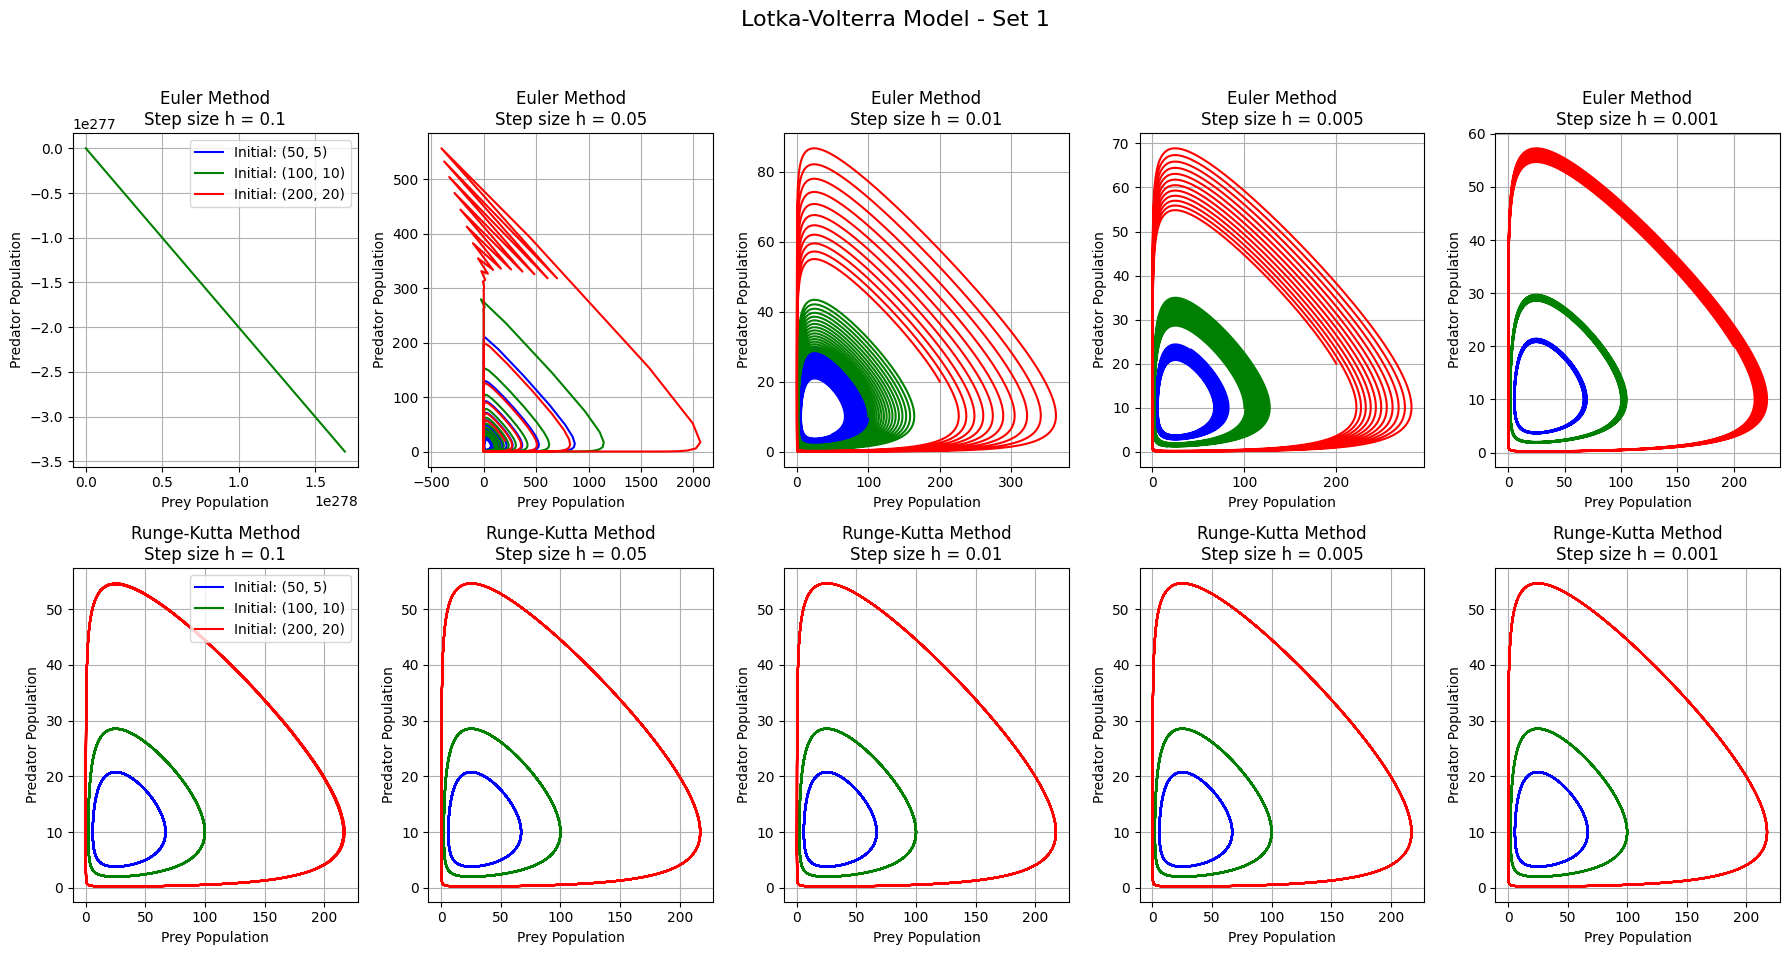

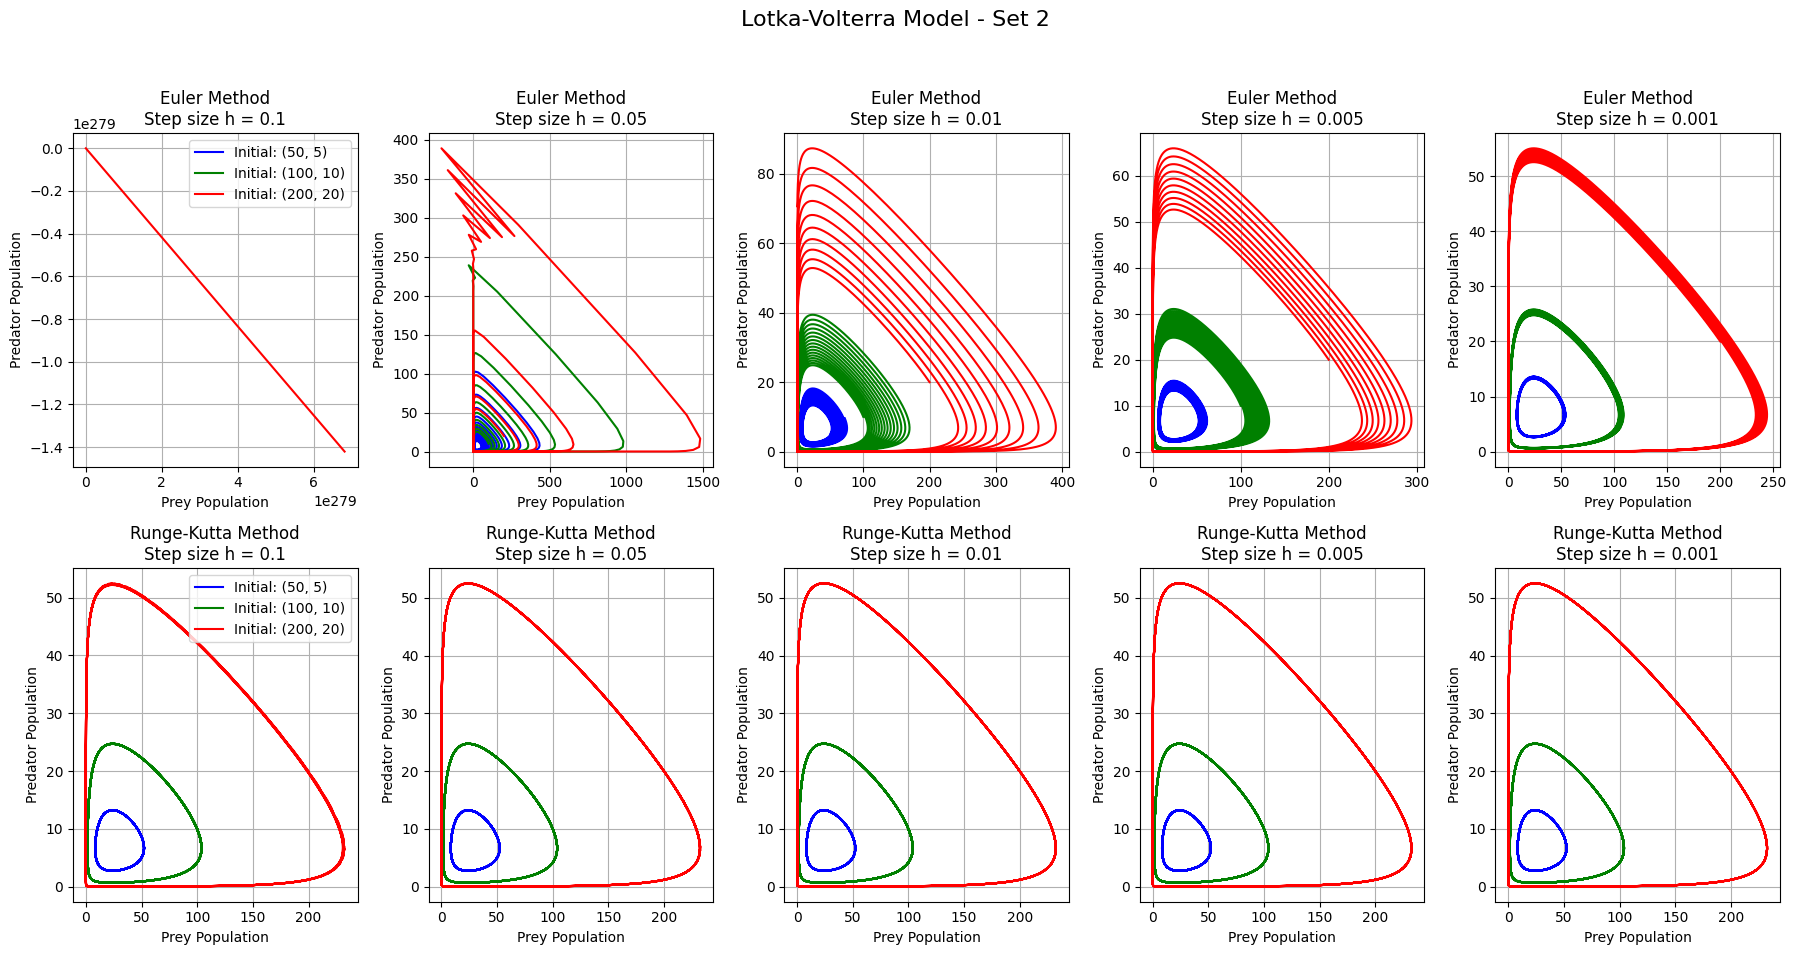

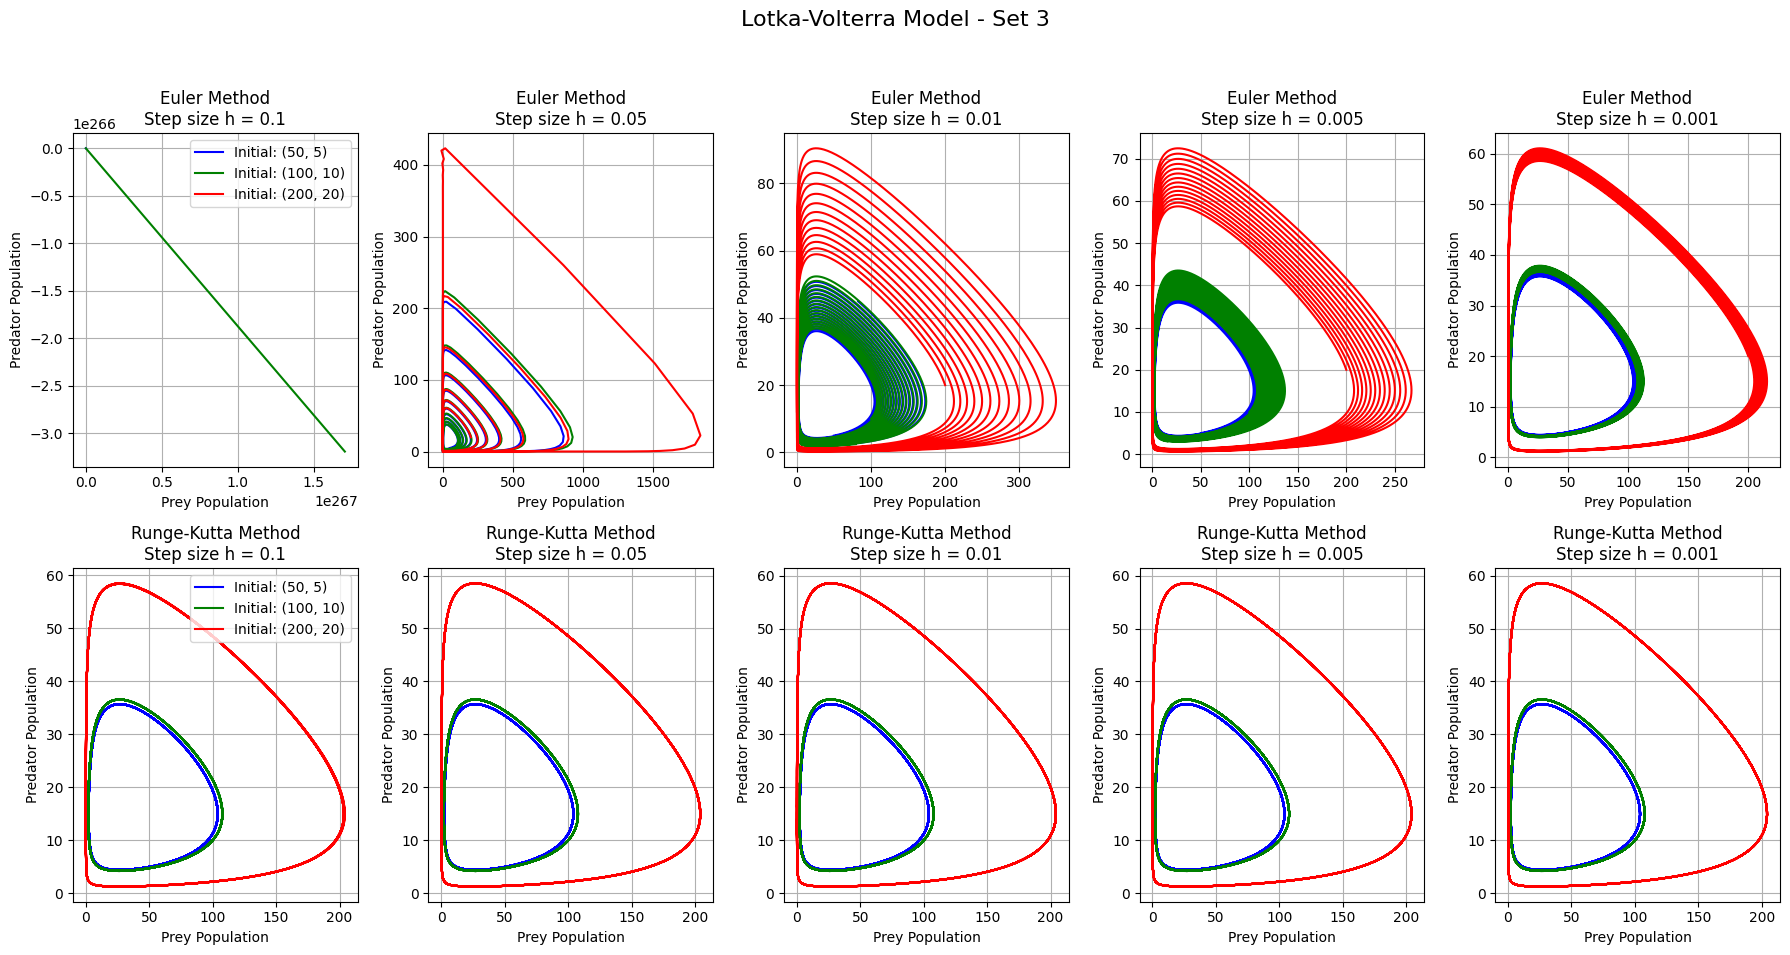

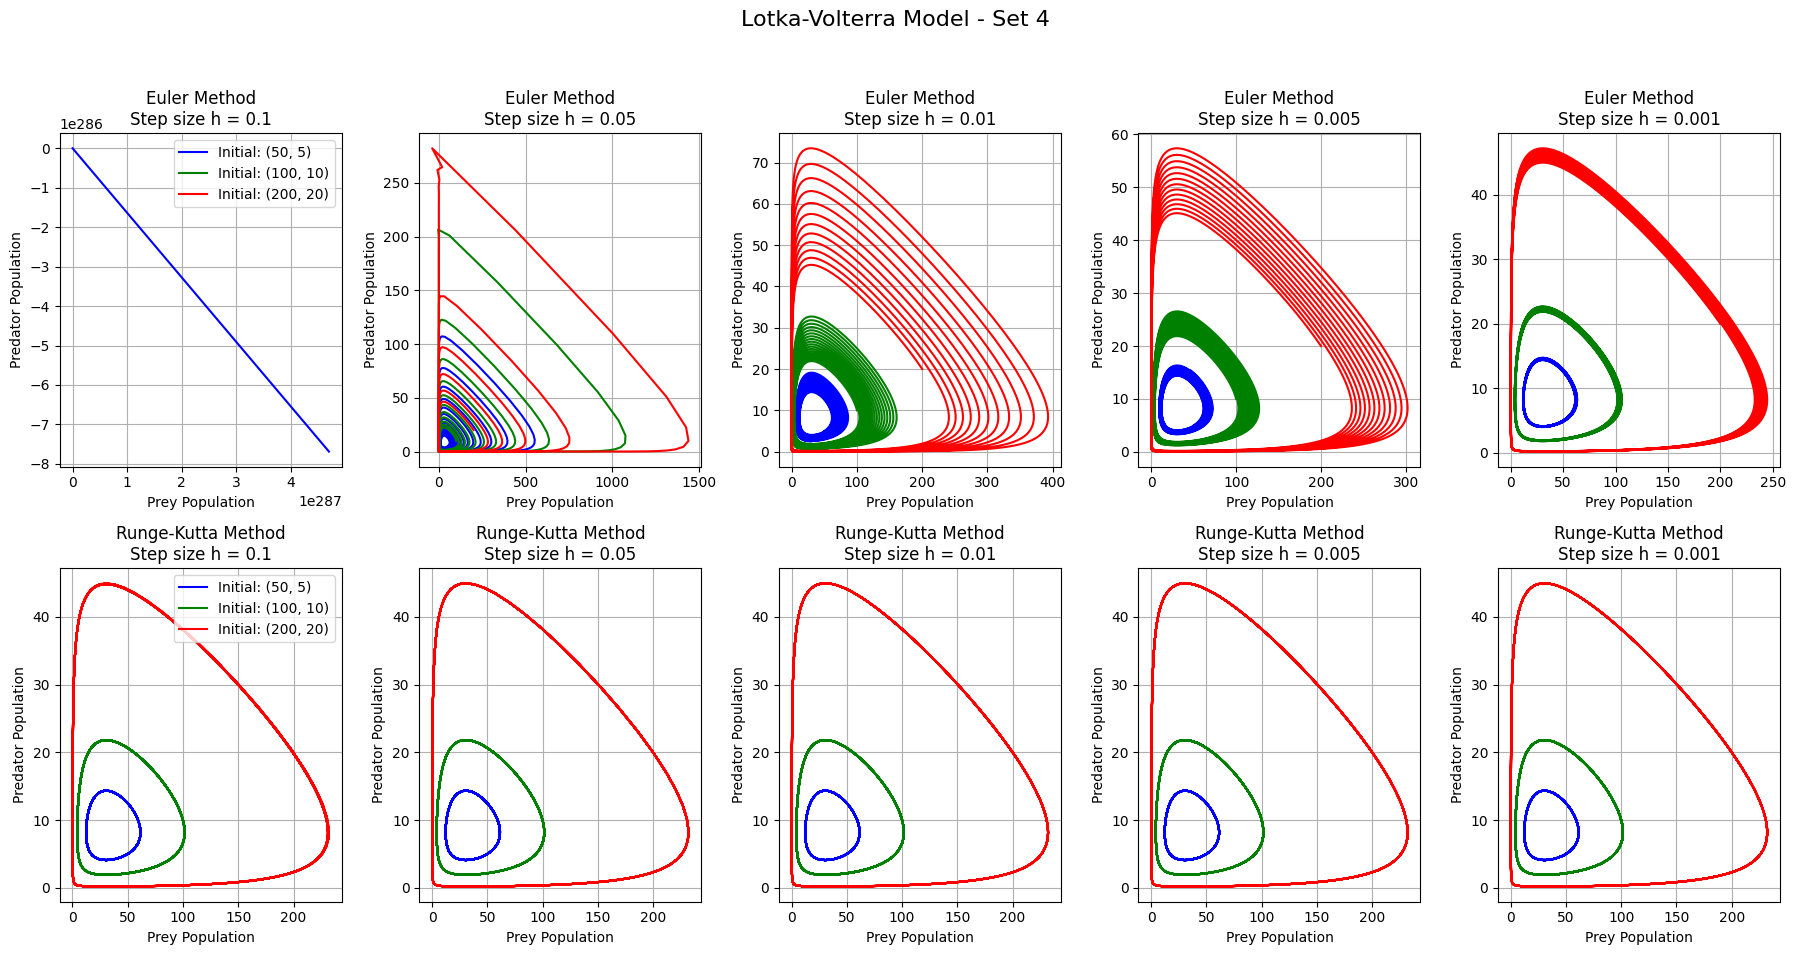

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Model Parameters for Different Scenarios
params_set_1 = {
    'growth_rate': 1.0,        # Prey growth rate (k)
    'death_rate': 0.5,         # Predator death rate (l)
    'predation_coeff': 0.1,    # Predation coefficient (a)
    'reproduction_coeff': 0.02 # Predator reproduction coefficient (b)
}

params_set_2 = {
    'growth_rate': 0.8,
    'death_rate': 0.6,
    'predation_coeff': 0.12,
    'reproduction_coeff': 0.025
}

params_set_3 = {
    'growth_rate': 1.2,
    'death_rate': 0.4,
    'predation_coeff': 0.08,
    'reproduction_coeff': 0.015
}

params_set_4 = {
    'growth_rate': 0.9,
    'death_rate': 0.55,
    'predation_coeff': 0.11,
    'reproduction_coeff': 0.018
}

# Compile all parameter sets into a list for iteration
parameter_sets = [
    {'name': 'Set 1', 'params': params_set_1},
    {'name': 'Set 2', 'params': params_set_2},
    {'name': 'Set 3', 'params': params_set_3},
    {'name': 'Set 4', 'params': params_set_4}
]

# Lotka-Volterra Differential Equations
def prey_growth(prey, predator, params):
    """Compute the derivative of prey population."""
    return prey * (params['growth_rate'] - params['predation_coeff'] * predator)

def predator_growth(prey, predator, params):
    """Compute the derivative of predator population."""
    return -predator * (params['death_rate'] - params['reproduction_coeff'] * prey)

# Euler Integration Scheme
def euler_integrator(prey_init, predator_init, step_size, total_steps, params):
    """Solve the Lotka-Volterra equations using Euler's method."""
    prey = np.zeros(total_steps)
    predator = np.zeros(total_steps)
    prey[0], predator[0] = prey_init, predator_init
    
    for i in range(1, total_steps):
        prey[i] = prey[i-1] + step_size * prey_growth(prey[i-1], predator[i-1], params)
        predator[i] = predator[i-1] + step_size * predator_growth(prey[i-1], predator[i-1], params)
    
    return prey, predator

# Runge-Kutta 4th Order Integration Scheme
def runge_kutta4_integrator(prey_init, predator_init, step_size, total_steps, params):
    """Solve the Lotka-Volterra equations using the 4th Order Runge-Kutta method."""
    prey = np.zeros(total_steps)
    predator = np.zeros(total_steps)
    prey[0], predator[0] = prey_init, predator_init
    
    for i in range(1, total_steps):
        # Compute Runge-Kutta coefficients for prey
        k1_prey = step_size * prey_growth(prey[i-1], predator[i-1], params)
        k1_predator = step_size * predator_growth(prey[i-1], predator[i-1], params)
        
        k2_prey = step_size * prey_growth(prey[i-1] + 0.5 * k1_prey, predator[i-1] + 0.5 * k1_predator, params)
        k2_predator = step_size * predator_growth(prey[i-1] + 0.5 * k1_prey, predator[i-1] + 0.5 * k1_predator, params)
        
        k3_prey = step_size * prey_growth(prey[i-1] + 0.5 * k2_prey, predator[i-1] + 0.5 * k2_predator, params)
        k3_predator = step_size * predator_growth(prey[i-1] + 0.5 * k2_prey, predator[i-1] + 0.5 * k2_predator, params)
        
        k4_prey = step_size * prey_growth(prey[i-1] + k3_prey, predator[i-1] + k3_predator, params)
        k4_predator = step_size * predator_growth(prey[i-1] + k3_prey, predator[i-1] + k3_predator, params)
        
        # Update populations
        prey[i] = prey[i-1] + (k1_prey + 2*k2_prey + 2*k3_prey + k4_prey) / 6
        predator[i] = predator[i-1] + (k1_predator + 2*k2_predator + 2*k3_predator + k4_predator) / 6
    
    return prey, predator

# Simulation Settings
time_steps = [0.1, 0.05, 0.01, 0.005, 0.001]  # Different step sizes (h)
integration_methods = {
    'Euler': euler_integrator,
    'Runge-Kutta': runge_kutta4_integrator
}
initial_states = [ # Initial populations: (prey, predator)
    (50, 5),   
    (100, 10),
    (200, 20)
]
# Colors for Different Parameter Sets
colors = ['blue', 'green', 'red', 'purple']

# Plotting the Results for Each Parameter Set
for param_set in parameter_sets:
    set_name = param_set['name']
    params = param_set['params']
    
    plt.figure(figsize=(18, 10))
    
    for method_name, integrator in integration_methods.items():
        for idx, h in enumerate(time_steps):
            plt.subplot(len(integration_methods), len(time_steps), idx + 1 + list(integration_methods.keys()).index(method_name)*len(time_steps))
            for state_idx, (prey_init, predator_init) in enumerate(initial_states):
                total_steps = int(200 / h)  # Total simulation steps
                prey_pop, predator_pop = integrator(prey_init, predator_init, h, total_steps, params)
                plt.plot(prey_pop, predator_pop, label=f'Initial: ({prey_init}, {predator_init})', color=colors[state_idx])
            
            plt.title(f'{method_name} Method\nStep size h = {h}')
            plt.xlabel('Prey Population')
            plt.ylabel('Predator Population')
            if idx == 0:
                plt.legend()
            plt.grid(True)
    
    plt.suptitle(f'Lotka-Volterra Model - {set_name}', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

## Results Analysis

#### Observations:

1. **Impact of Initial States**:
   - **Small Initial Populations** ($50, 5$): The dynamics stabilize into small periodic oscillations in all parameter sets, showing a smaller range of interaction between predator and prey.
   - **Medium Initial Populations** ($100, 10$): The populations exhibit larger oscillations, indicating higher interaction intensities before stabilizing into periodic orbits.
   - **Large Initial Populations** ($200, 20$): The system starts with high oscillatory behavior, with the predator population growing quickly due to the abundance of prey before stabilizing into large periodic orbits.

2. **Comparison Between Methods**:
   - **Euler's Method**:
     - Large errors are noticeable for larger step sizes ($h = 0.1, 0.05$), leading to erratic or diverging trajectories (e.g., unbounded growth in some plots).
     - For smaller step sizes ($h = 0.01$), the method converges to results closer to the Runge-Kutta method, but with visible inaccuracies.
   - **Runge-Kutta Method**:
     - Consistently stable across all step sizes, with smooth periodic orbits even for larger initial populations.
     - Clearly outperforms Euler's method in terms of numerical stability and accuracy.

3. **Effect of Parameter Sets**:
   - **Set 1**: Exhibits balanced dynamics with periodic oscillations stabilizing over time.
   - **Set 2**: Shows more apparent predator-prey interaction, with higher predation rates leading to sharper oscillations.
   - **Set 3**: Features a faster-growing prey population, resulting in extended orbits and delayed stabilization.
   - **Set 4**: Balanced parameters lead to moderate oscillations similar to Set 1, but with slightly reduced predator population peaks.

4. **Effect of Step Sizes**:
   - Larger step sizes ($h = 0.1, 0.05$) cause instability in Euler's method, particularly for large initial populations.
   - Smaller step sizes ($h = 0.01$) improve accuracy for Euler's method but still do not match the precision of the Runge-Kutta method.

#### Conclusions
- **Initial States Matter**: Larger populations amplify oscillations and interaction dynamics, while smaller populations stabilize quickly.
- **Runge-Kutta is More Stable**: It consistently outperforms Euler's method in stability and accuracy, especially for smaller step sizes.
- **Step Size Impacts Accuracy with Euler's Method**: Smaller step sizes improve results and are essential for Euler's method to avoid instability.
- **Parameter Sensitivity**: Different parameter sets significantly affect the interaction dynamics, showing the model's sensitivity to different assumptions.